In [29]:
%pip install seaborn
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Note: you may need to restart the kernel to use updated packages.


Split data into a training and testing dataset
Due to the fact that the data is both already sorted by user and time, we will need to 'unsort' to gain a proper random sampling 

Steps 
    1) 'Unsort' and 'shuffle' data
    2) develop 2 files that are accurate random samplings of data 
    3) ensure files are random samplings of data

In [30]:
dataset = pd.read_csv("./geophone/geophone-sensor-data.csv")

dataset_sorted = dataset.sort_values(by=["name", "timestamp"], ascending=[True, True])

Text(0.5, 0.98, 'Distribution of Mean')

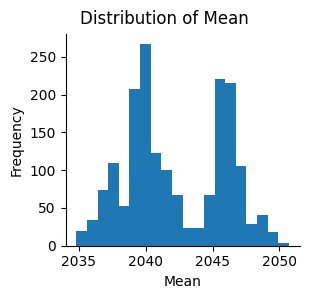

In [31]:
og = sns.FacetGrid(dataset_sorted)
og.map(plt.hist, 'mean', bins=20)

og.set_axis_labels("Mean", "Frequency")
og.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
og.figure.suptitle("Distribution of Mean")

In [32]:
train, test = train_test_split(dataset_sorted, test_size=0.5, random_state=42, shuffle=True)
print(train.head())
print('_'*40)
print(test.head())

     timestamp         mean   top_3_mean   min   max   std_dev  median  \
1710  21:12:44  2037.283333  2041.000000  2033  2041  1.858419  2038.0   
874   02:42:25  2039.936000  2071.333333  2007  2075  5.534851  2040.0   
1252  03:46:51  2042.155333  2048.000000  2037  2048  2.716715  2042.0   
1345  02:47:35  2041.374000  2047.000000  2035  2047  3.268964  2043.0   
873   02:42:22  2039.518667  2055.000000  2018  2055  3.941445  2041.0   

          q1      q3  skewness  dominant_freq        energy activity    name  
1710  2036.0  2039.0 -0.423633          600.0  1.930823e+09  waiting    Emir  
874   2035.0  2045.0 -0.127944          600.0  1.947087e+09  running  Furkan  
1252  2040.0  2045.0  0.110133          300.0  1.960641e+09  waiting   Yusuf  
1345  2039.0  2044.0 -0.585361          300.0  1.955860e+09  waiting    Enes  
873   2035.0  2042.0 -0.438889          300.0  1.944511e+09  running  Furkan  
________________________________________
     timestamp         mean   top_3_mean

Text(0.5, 0.98, 'Distribution of Training Mean')

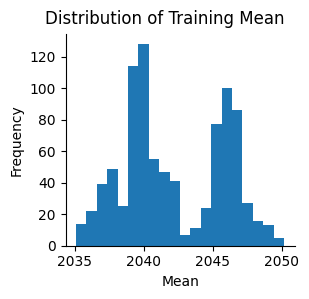

In [33]:
train_g = sns.FacetGrid(train)
train_g.map(plt.hist, 'mean', bins=20)
train_g.set_axis_labels("Mean", "Frequency")
train_g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
train_g.figure.suptitle("Distribution of Training Mean")

Text(0.5, 0.98, 'Distribution of Test Mean')

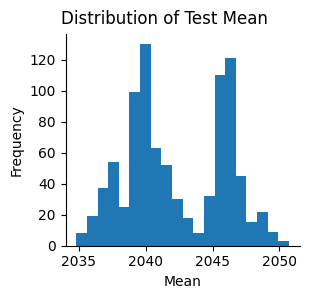

In [34]:
test_g = sns.FacetGrid(test)
test_g.map(plt.hist, 'mean', bins=20)

test_g.set_axis_labels("Mean", "Frequency")
test_g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
test_g.figure.suptitle("Distribution of Test Mean")

Cannot use person as a afeature due to below inconsistencies. We have to look at the data holistically. 

Test if there are outliers or noise in the data 

Binning and standardizing

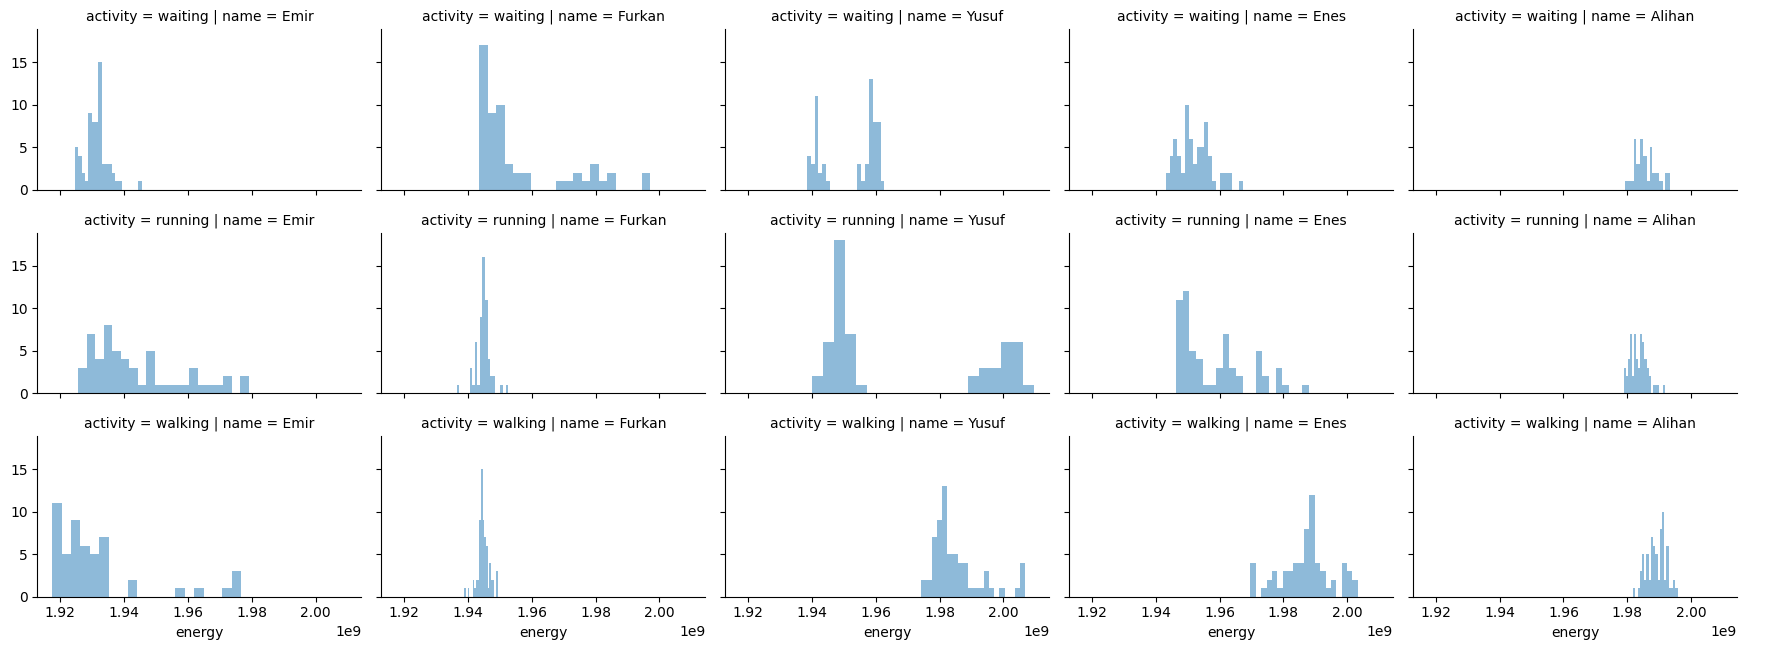

In [35]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.hist, 'energy', alpha=.5, bins=20)
grid.add_legend();

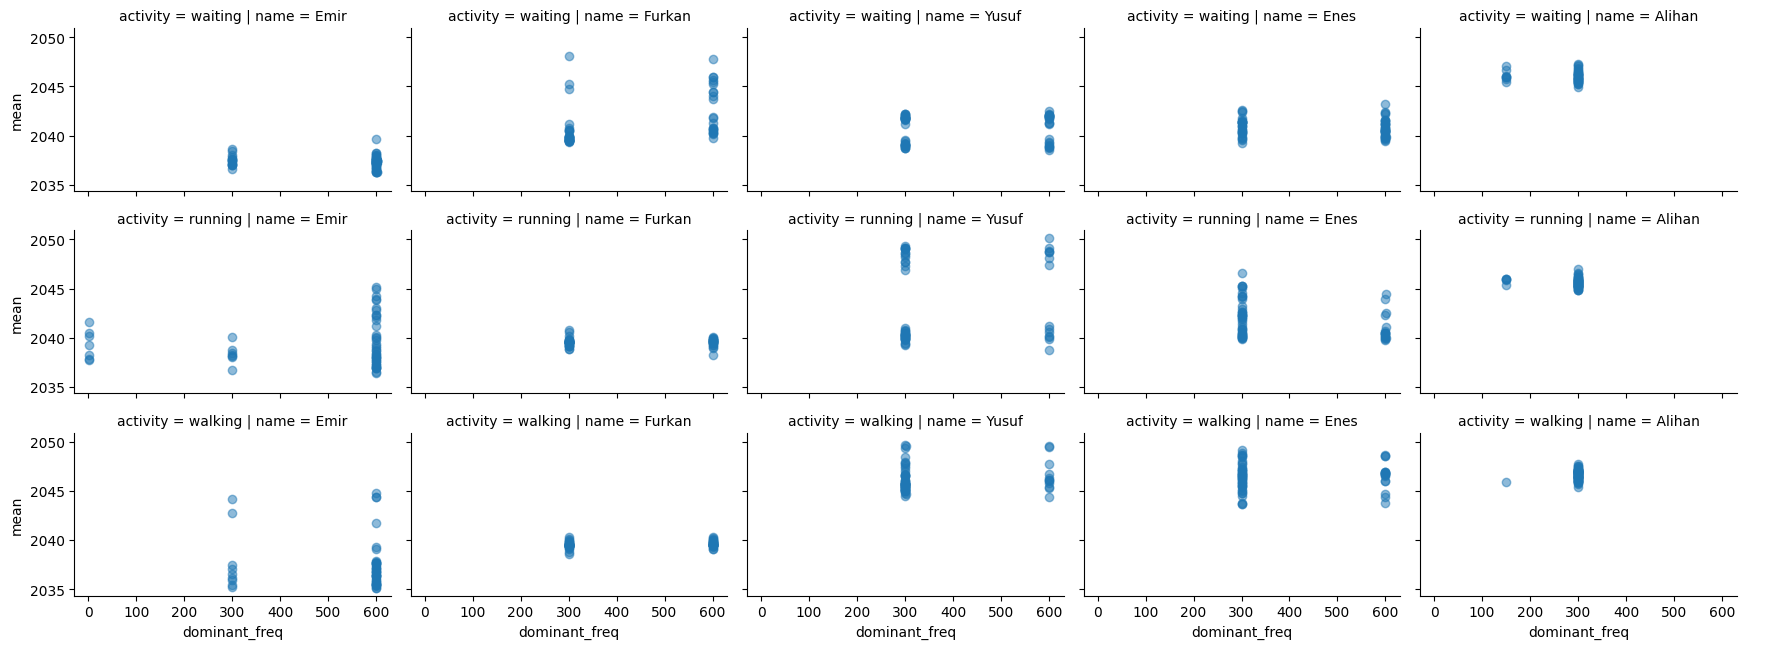

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.scatter, 'dominant_freq', 'activty', alpha=.5)
grid.add_legend();

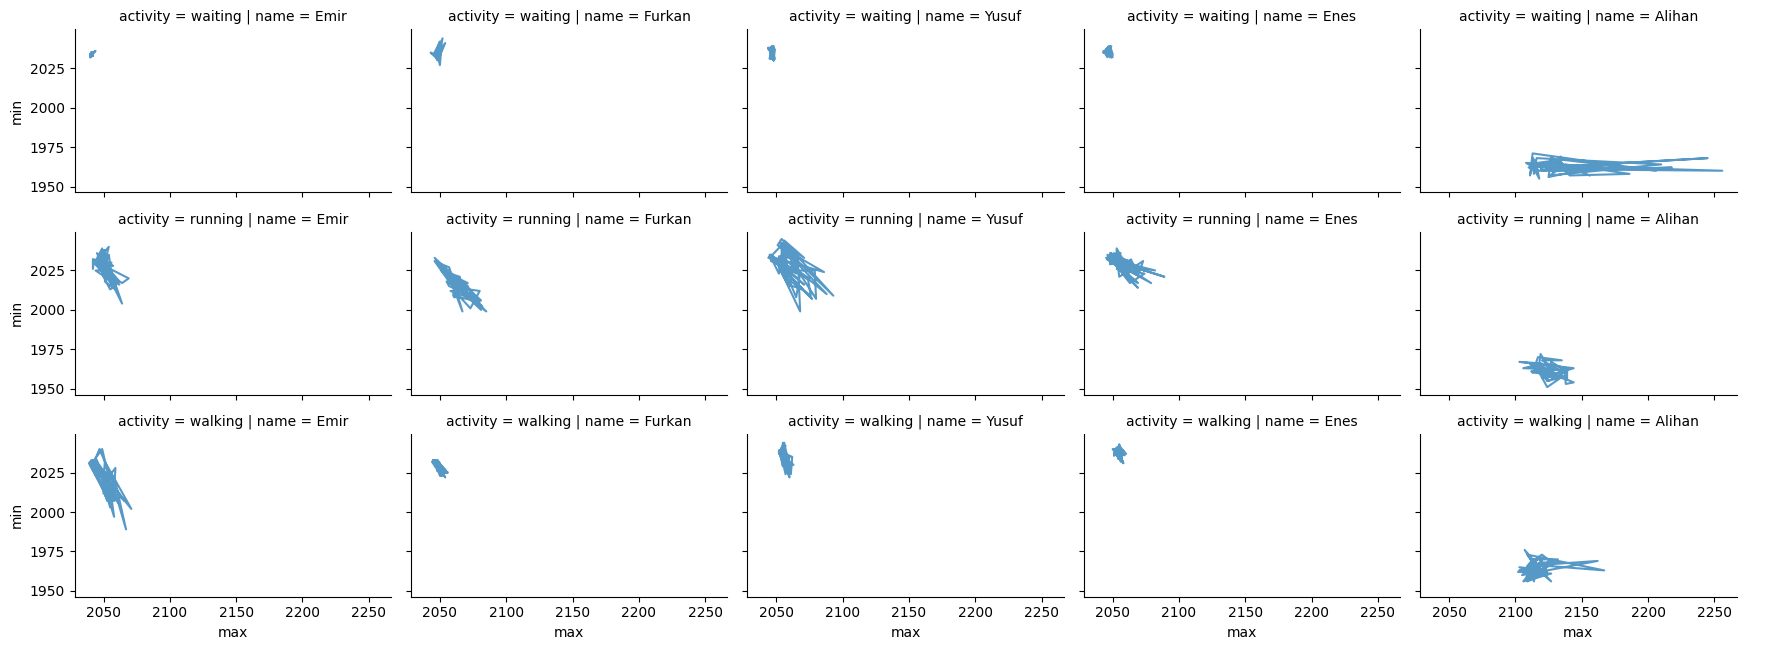

In [42]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.plot, 'max', 'min', alpha=.75)
grid.add_legend();

Display data in graphs 

?????????

Titantic it 